In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# データの読み込み
penguins = sns.load_dataset('penguins')

# ヒゲペンギンとジェンツーペンギンのデータのみを抽出
penguins = penguins[penguins['species'].isin(['Chinstrap', 'Gentoo'])]

# 必要な列の欠損値を除外
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'species'])

# 説明変数と目的変数の設定
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins['species']

# 目的変数を数値に変換
y_numeric = y.map({'Chinstrap': 0, 'Gentoo': 1})

In [2]:
# ロジスティック回帰モデルの作成と学習（データ全体を使用）
model = LogisticRegression()
model.fit(X, y_numeric)

# 訓練データで予測
y_pred = model.predict(X)

In [3]:
# モデルの評価
accuracy = accuracy_score(y_numeric, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [4]:
# 混同行列の表示
print('Confusion Matrix:')
print(confusion_matrix(y_numeric, y_pred))

Confusion Matrix:
[[ 64   4]
 [  2 121]]


In [5]:
# 分類レポートの表示
print('Classification Report:')
print(classification_report(y_numeric, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.97      0.98      0.98       123

    accuracy                           0.97       191
   macro avg       0.97      0.96      0.97       191
weighted avg       0.97      0.97      0.97       191



Accuracy: 0.97
Confusion Matrix:
[[ 64   4]
 [  2 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.97      0.98      0.98       123

    accuracy                           0.97       191
   macro avg       0.97      0.96      0.97       191
weighted avg       0.97      0.97      0.97       191



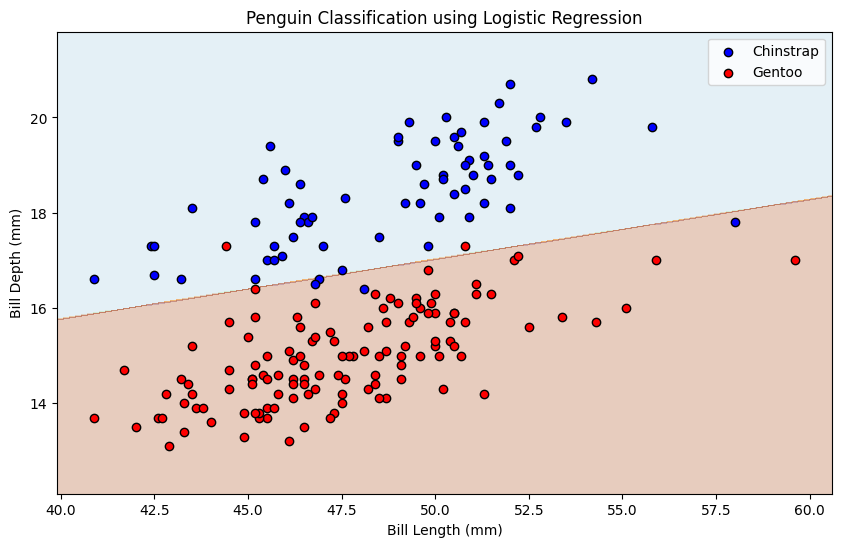

In [ ]:
# 分類結果のプロット
# メッシュグリッドの作成
h = .02  # ステップサイズ
x_min, x_max = X['bill_length_mm'].min() - 1, X['bill_length_mm'].max() + 1
y_min, y_max = X['bill_depth_mm'].min() - 1, X['bill_depth_mm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# メッシュグリッド上での予測
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_df = pd.DataFrame(mesh_points, columns=['bill_length_mm', 'bill_depth_mm'])
Z = model.predict(mesh_df)
Z = Z.reshape(xx.shape)

# 描画
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# データポイントの散布図
species_list = ['Chinstrap', 'Gentoo']
colors = ['blue', 'red']
for species, color in zip(species_list, colors):
    idx = y == species
    plt.scatter(X.loc[idx, 'bill_length_mm'], X.loc[idx, 'bill_depth_mm'],
                c=color, edgecolor='k', label=species)

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Penguin Classification using Logistic Regression')
plt.legend()
plt.show()